Quantum circuits
In the quantum circuit model, wires represent qubits and gates represent operations
acting on these qubits. We'll focus for now on operations we've encountered so far,
namely unitary operations and standard basis measurements. As we learn about other
sorts of quantum operations and measurements, we'll enhance our model accordingly.
Here's a simple example of a quantum circuit:

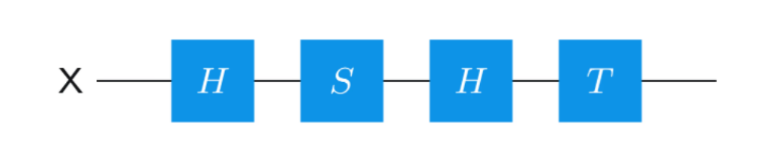

In this circuit, we have a single qubit named X, which is represented by the horizontal line,
and a sequence of gates representing unitary operations on this qubit. Just like in the
examples above, the flow of information goes from left to right — so the first operation
performed is a Hadamard, the second is an S operation, the third is another Hadamard,
and the final operation is a T operation. Applying the entire circuit therefore applies the
composition of these operations, THSH, to the qubit X.

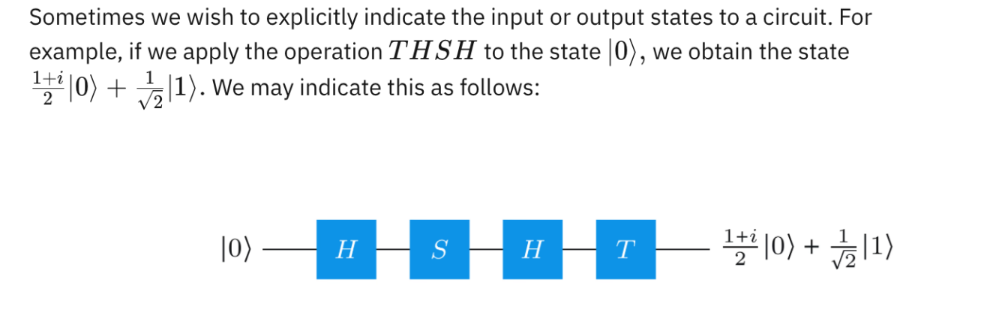

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister 
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit.visualization import plot_bloch_vector,plot_gate_map,plot_circuit_layout,plot_histogram



To begin, we can create the circuit as follows, by sequentially adding gates from left to
right.

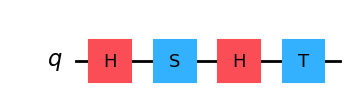

In [4]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw(output='mpl'))

The default names for qubits in Qiskit are q0, q1, q2 etc., and when there is just a single
qubit like in our example, the default name is q rather than q0. If we wish to choose our
own name we can do this using the Quantum Register class like this:

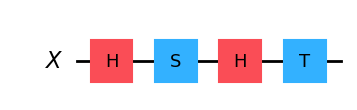

In [5]:
X = QuantumRegister(1,"X")
circuit = QuantumCircuit(X)
circuit.h(X[0])
circuit.s(X[0])
circuit.h(X[0])
circuit.t(X[0])

display(circuit.draw(output='mpl'))

In this circuit we have a Hadamard gate and a controlled-NOT gate on two
qubits X and Y, just like in the previous example. We also have
two classical bits, AA and B,B, as well as two measurement gates. The measurement

gates represent standard basis measurements: the qubits are changed into their post-
measurement states, while the measurement outcomes are overwritten onto the

classical bits to which the arrows point.

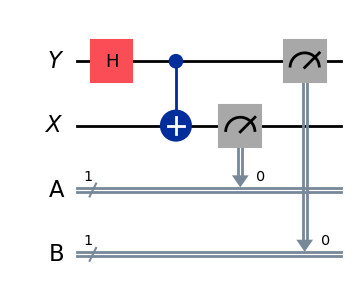

In [9]:
X = QuantumRegister(1,"X")
Y = QuantumRegister(1,"Y")
A = ClassicalRegister(1,"A")
B = ClassicalRegister(1,"B")
circuit = QuantumCircuit(Y,X,A,B)
circuit.h(Y)
circuit.cx(Y,X)
circuit.measure(X[0],A[0])
circuit.measure(Y[0],B[0])



display(circuit.draw(output='mpl'))


The circuit can be simulated using the Sampler primitive.

PrimitiveResult([SamplerPubResult(data=DataBin(A=BitArray(<shape=(), num_shots=1024, num_bits=1>), B=BitArray(<shape=(), num_shots=1024, num_bits=1>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2})


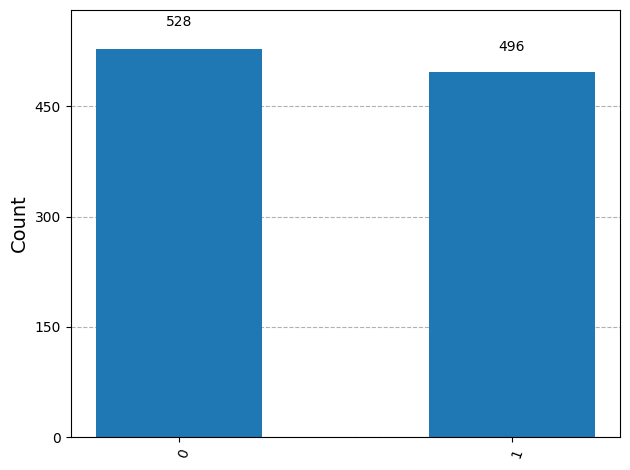

In [ ]:
results = Sampler().run([circuit]).result()
print(results)
statistics = results[0].data.get_counts()
display(plot_histogram(statistics))

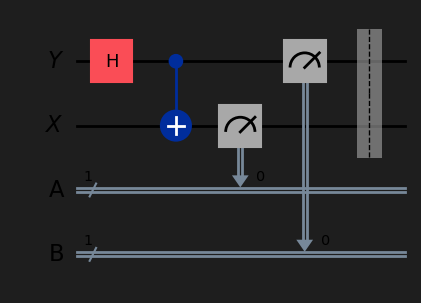

Measurement Results:
{'11': 506, '00': 518}


In [23]:
# from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Quantum & Classical Registers
Y = QuantumRegister(1, "Y")
X = QuantumRegister(1, "X")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

# Quantum Circuit
circuit = QuantumCircuit(Y, X, A, B)

# Create Bell State |Φ+⟩ = (|00⟩ + |11⟩)/√2
circuit.h(Y)       # Hadamard on Y
circuit.cx(Y, X)   # CNOT (control=Y, target=X)

# Measure both qubits
circuit.measure(X[0], A[0])
circuit.measure(Y[0], B[0])

# Better visualization (with barriers + style)
circuit.barrier()
display(circuit.draw(output='mpl', style={'backgroundcolor': '#1e1e1e', 'displaytextcolor': '#ffffff'}))

# Simulation using Sampler primitive
results = Sampler().run([circuit], shots=1024).result()
# Extract counts from BitArray data
data = results[0].data
# Combine A and B measurements to get full bitstring counts
a_bits = data.A.get_bitstrings()
b_bits = data.B.get_bitstrings()
counts = {}
for a, b in zip(a_bits, b_bits):
	bitstring = b + a  # B is the higher-order bit
	counts[bitstring] = counts.get(bitstring, 0) + 1

# Show results
print("Measurement Results:")
print(counts)
plot_histogram(counts, title="Bell State Measurement Results", bar_labels=True)
plt.show()
